In [1]:
from ImprovedWeightFracs import ImprovedWeightFracs
from dragpolar import dragpolar
from PreliminarySizing import PrelimSize
from Weight_Iteration_With_Fuel_fracs import WeightBuildUp
from carpet import carpet
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines # pip install matplotlib-label-lines

In [2]:
WS,WP = PrelimSize()
print(WS,WP)
WeightBuildUp(WS,WP)

69.36423531558572 8.564498702867692
49684.97313945848


49684.97313945848

In [3]:
# FIRST CARPET PLOT: 
# OBJECTIVES: L/D_cruise, MTOW
# PARAMETERS: Cruise Velocity, AR

def LD_cruise(V_cruise,AR):
    dpobj = dragpolar(AR)
    # MTOW = WeightBuildUp(WS,WP,ARw=AR)
    CL = WS/(0.5*0.0010651*V_cruise**2)

    return CL/dpobj.CD(1,CL)
def MTOW(V_cruise,AR):
    # print('USING {}'.format(AR))
    return WeightBuildUp(WS,WP,V_cruise,ARw=AR)

x1= 1.68780986*np.array([275.0,350.0],float) # Cruise Velocity
labelx1 = 'V_cruise'
x2= [17.51-2,17.51+2] # AR
labelx2 = 'AR'
n=5

N= n + 1*(n-1)
print(n,N)
carpet(LD_cruise,MTOW,x1,x2,n,N,labelx1,labelx2)
plt.xlabel('MTOW [lbf]')
plt.grid()
plt.ylabel('L/D_cruise')
plt.savefig('Figures/DS1.svg')


5 5


c:\Users\Overk\anaconda3\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 0 in `xvals` is outside the range of its associated line (xmin=63.058395741441565, xmax=63.058395741441565, xval=74.51400430113678). Clipping it into the allowed range.
  warnings.warn(
c:\Users\Overk\anaconda3\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 1 in `xvals` is outside the range of its associated line (xmin=68.31326205322837, xmax=68.31326205322837, xval=76.40575617338003). Clipping it into the allowed range.
  warnings.warn(
c:\Users\Overk\anaconda3\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 2 in `xvals` is outside the range of its associated line (xmin=73.56812836501517, xmax=73.56812836501517, xval=78.29750804562327). Clipping it into the allowed range.
  warnings.warn(
c:\Users\Overk\anaconda3\lib\site-packages\labellines\core.py:204: UserWarning: The value at position 3 in `xvals` is outside the range of i

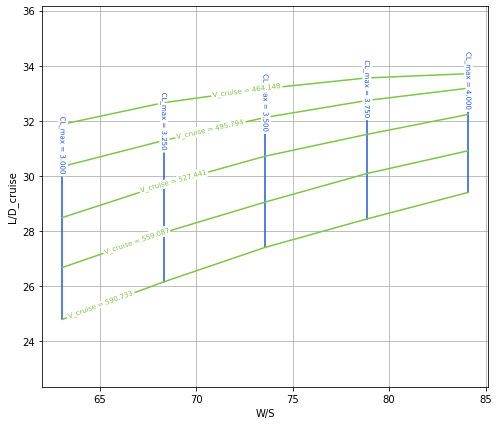

In [4]:
# FIRST CARPET PLOT: 
# OBJECTIVES: L/D_cruise, W/S
# PARAMETERS: C_Lmax, V_cruise

def LD_cruise(C_Lmax,V_cruise):
    dpobj = dragpolar()
    WS,WP = PrelimSize(CL_max_L = C_Lmax)
    # print(WS,WP)
    # MTOW = WeightBuildUp(WS,WP,ARw=AR)
    CL = WS/(0.5*0.0010651*V_cruise**2)

    return CL/dpobj.CD(1,CL)
def WS_obj(C_Lmax, V_cruise):
    WS,WP = PrelimSize(CL_max_L = C_Lmax)
    return WS

x1= [3,4] # CL_max Velocity
labelx1 = 'CL_max'
x2= 1.68780986*np.array([275.0,350.0],float) # V_cruise
labelx2 = 'V_cruise'
n=5

N= n + 0*(n-1)
print(n,N)
carpet(WS_obj,LD_cruise,x1,x2,n,N,labelx1,labelx2)
plt.ylabel('L/D_cruise')
by,ty = plt.ylim()
plt.ylim(by-2,ty+2)
plt.grid()
plt.xlabel('W/S')
plt.savefig('Figures/DS2.svg')